# Analysis of PISA 2012 Results
## by Nasiru Mohammed Ibrahim

## Introduction
> PISA (Program for International Student Assessment) 2012 is the programme’s 5th survey. It assessed the competencies of 15-year-olds in reading, mathematics and science (with a focus on mathematics) in 65 countries and economies. Around 510 000 students between the ages of 15 years 3 months and 16 years 2 months participated in PISA 2012 as a whole representing about 28 million 15-year-olds globally.

> The participating countries were split into two groups based on membership status in the OECD (The Organization for Economic Cooperation and Development).

> The ISCED (The International Standard Classification of Education) level 0, is an early childhood programme that has an intentional education component. Student participation in the ISCED level 0 will also be considered.


## Preliminary Wrangling


> Due to the size of the data, the Big Data tool Dask will be used to load and handle the data. Column selection, dropping of missing values, and computing summary statistics will also be carried out before the visualization step.

In [1]:
! python -m pip install dask[dataframe] --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 141 kB 4.3 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dask import dataframe as dd
import requests
import zipfile
import os

%matplotlib inline

> Function definitions

In [3]:
def histogram(x):
  bins = np.arange(0, 1000+50, 50)

  plt.figure(figsize=(10,6))
  _ = plt.hist(df_pisa[x].compute(), bins=bins)
  plt.xlabel(x)
  plt.ylabel('count')
  _ = plt.title(f'Histogram of {" ".join(x.split("_"))} scores')

def scatter(x,y):
  plt.figure(figsize=(10,6))
  _ = sns.scatterplot(x=df_pisa[x].compute(), y=df_pisa[y].compute(), alpha=0.2)
  _ = plt.title(f'Scatterplot of {x} vs {y}')

def box(x,y):
  plt.figure(figsize=(10,6))
  _ = sns.boxplot(x=df_pisa[x].compute(), y=df_pisa[y].compute(), color=sns.color_palette()[0])
  _ = plt.title(f'Box plot of {x} vs {y}')

def clustered_bar(x, hue, order=None):
  plt.figure(figsize=(10,6))
  _ = sns.countplot(x=df_pisa[x].compute(), hue=df_pisa[hue].compute(), order=order)
  _ = plt.title(f'Clustered bar chart of {x} vs {hue}')

def multi_bar(x, hue, order, y):
    plt.figure(figsize=(10,6))
    _ = sns.barplot(x=df_pisa[x].compute(), y=df_pisa[y].compute(), hue=df_pisa[hue].compute(), order=order)
    _ = plt.title(f'Multivariate plot of {x}, {hue} and {y}')

def top_region_perf(y):
  plt.figure(figsize=(11,7))
  top_7 = df_pisa.groupby('region')[[y]].mean().compute().sort_values(by=y).reset_index()[-7:]
  _ = sns.barplot(x='region', y=y, data=top_7, color=sns.color_palette()[0])
  _ = plt.title(f'Top 7 performing regions in {y}')


> Downloading the zip file, and extracting to obtain the csv file.

In [4]:
if os.path.exists('pisa2012.csv') == False:
    r = requests.get('https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip', allow_redirects=True)
    open('pisa2012.zip', 'wb').write(r.content)
    with zipfile.ZipFile('pisa2012.zip', 'r') as zip_ref:
        zip_ref.extractall('./')

In [5]:
df_pisa = dd.read_csv('pisa2012.csv', encoding='latin-1', low_memory=False, usecols=['CNT', 'OECD', 'ST04Q01', 'ST05Q01', 'ST20Q01', 'PV1MATH', 'PV1READ', 'PV1SCIE'])

In [6]:
columns = {'CNT': 'region', 'OECD': 'oecd_country', 'ST04Q01': 'gender',
           'ST05Q01': 'attended_isced_0', 'ST20Q01': 'country_of_birth',
           'PV1MATH' : 'plausible_value_1_math','PV1READ': 'plausible_value_1_reading', 'PV1SCIE' : 'plausible_value_1_science'}
df_pisa = df_pisa.rename(columns=columns)

In [7]:
df_pisa.dtypes

region                        object
oecd_country                  object
gender                        object
attended_isced_0              object
country_of_birth              object
plausible_value_1_math       float64
plausible_value_1_reading    float64
plausible_value_1_science    float64
dtype: object

In [8]:
df_pisa.head()

,region,oecd_country,gender,attended_isced_0,country_of_birth,plausible_value_1_math,plausible_value_1_reading,plausible_value_1_science
0,Albania,Non-OECD,Female,No,Country of test,406.8469,249.5762,341.7009
1,Albania,Non-OECD,Female,"Yes, for more than one year",Country of test,486.1427,406.2936,548.9929
2,Albania,Non-OECD,Female,"Yes, for more than one year",Country of test,533.2684,401.2100,499.6643
3,Albania,Non-OECD,Female,"Yes, for more than one year",Country of test,412.2215,547.3630,438.6796
4,Albania,Non-OECD,Female,"Yes, for more than one year",Country of test,381.9209,311.7707,361.5628


In [9]:
df_pisa.isnull().sum().compute()

region                          0
oecd_country                    0
gender                          0
attended_isced_0             9324
country_of_birth             9127
plausible_value_1_math          0
plausible_value_1_reading       0
plausible_value_1_science       0
dtype: int64

In [10]:
df_pisa = df_pisa.dropna()

In [11]:
n_rows, n_columns = len(df_pisa), df_pisa.shape[1]

In [12]:
print(n_rows, n_columns)

471533 8


In [13]:
for col in ['region', 'oecd_country', 'gender', 'attended_isced_0', 'country_of_birth']:
  display(df_pisa[col].value_counts().compute())
  print('\n')

Mexico                      33065
Italy                       30598
Spain                       24677
Canada                      20677
Brazil                      18210
                            ...  
Florida (USA)                1833
Perm(Russian Federation)     1747
Massachusetts (USA)          1679
Connecticut (USA)            1658
Liechtenstein                 286
Name: region, Length: 68, dtype: int64

OECD        287396
Non-OECD    184137
Name: oecd_country, dtype: int64

Female    239174
Male      232359
Name: gender, dtype: int64

Yes, for more than one year    316702
Yes, for one year or less      102235
No                              52596
Name: attended_isced_0, dtype: int64

Country of test    437507
Other country       34026
Name: country_of_birth, dtype: int64

In [14]:
df_pisa.describe().compute()

,plausible_value_1_math,plausible_value_1_reading,plausible_value_1_science
count,471533.000000,471533.000000,471533.000000
mean,471.729193,474.497575,477.974664
std,102.507261,101.075106,100.447419
min,19.792800,0.083400,6.844500
25%,431.850800,440.490200,443.435300
50%,500.241500,507.111300,512.625900
75%,617.218425,580.803500,599.067500
max,962.229300,904.802600,903.338300


### Structure of the Dataset

> After the wrangling step, the dataset has 471,533 rows and 8 columns. 

### Main Features of Interest

> The main features of interest are plausible_value_1_math,	plausible_value_1_reading, and	plausible_value_1_science, as they indicate how well the students performed on the test.

### Supporting Features

> The country,	oecd_country,	gender,	attended_isced_0 and	country_of_birth	features will be used to support investigation into the main features.

## Univariate Exploration

> In this section, we investigate distributions of individual variables, using the Question-Observation-Visualization format.


###How is plausible_value_1_math distributed?

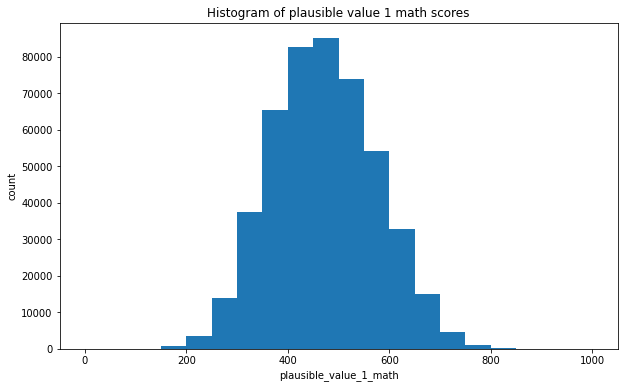

In [15]:
histogram('plausible_value_1_math')

> The distribution of the plausible_value_1_math variable appears approximately normal. No further transformation is required on the data.

###How is plausible_value_1_reading distributed?

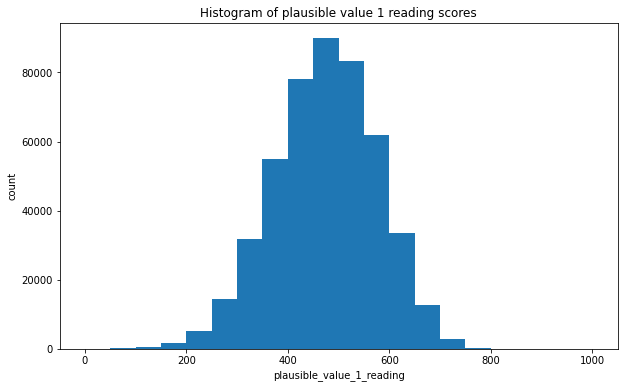

In [16]:
histogram('plausible_value_1_reading')

> The distribution of the plausible_value_1_reading variable appears approximately normal. No further transformation is required on the data.

###How is plausible_value_1_science distributed?

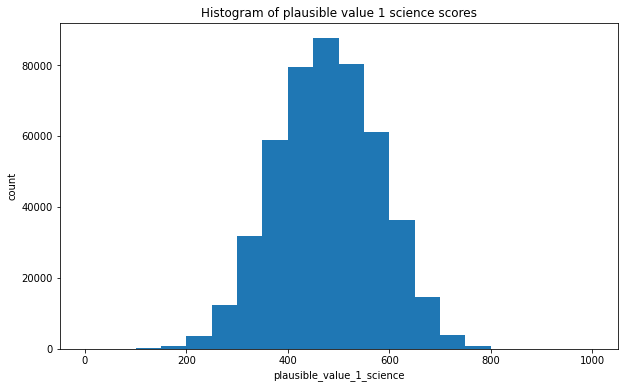

In [17]:
histogram('plausible_value_1_science')

> The distribution of the plausible_value_1_science variable appears approximately normal. No further transformation is required on the data.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables, using the Question-Observation-Visualization format.

###What is the relationship between plausible_value_1_math and plausible_value_1_science?

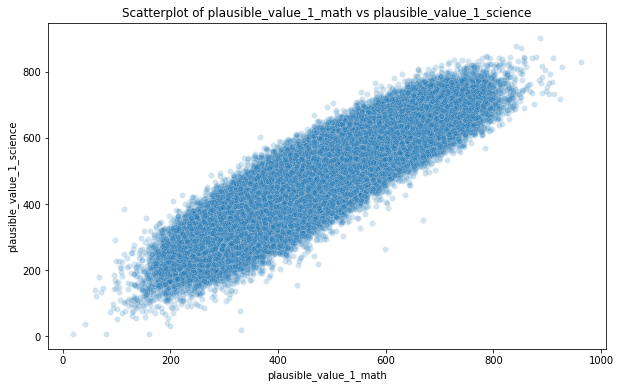

In [18]:
scatter('plausible_value_1_math', 'plausible_value_1_science')

In [19]:
df_pisa[['plausible_value_1_math' ,'plausible_value_1_science']].corr().compute()

,plausible_value_1_math,plausible_value_1_science
plausible_value_1_math,1.000000,0.901661
plausible_value_1_science,0.901661,1.000000


> The scatterplot and pearson correlation values show that students that perform well in math show similar proficiency in science and vice versa.

###What is the relationship between plausible_value_1_math and plausible_value_1_reading?

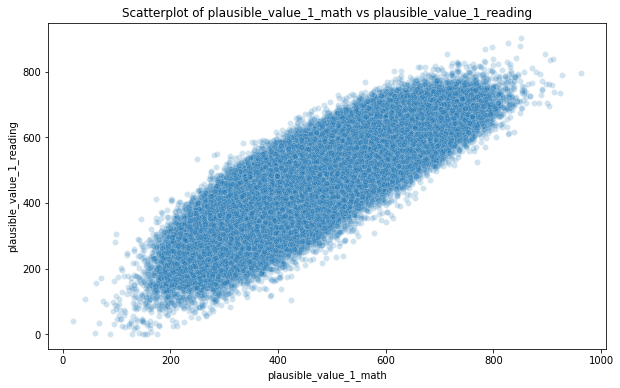

In [20]:
scatter('plausible_value_1_math', 'plausible_value_1_reading')

In [21]:
df_pisa[['plausible_value_1_math' ,'plausible_value_1_reading']].corr().compute()

,plausible_value_1_math,plausible_value_1_reading
plausible_value_1_math,1.000000,0.854828
plausible_value_1_reading,0.854828,1.000000


> 

> The scatterplot and pearson correlation values show that students that perform well in math show similar proficiency in reading and vice versa, but to a lesser extent than the relationship between math and science.

###What is the relationship between plausible_value_1_reading and plausible_value_1_science?

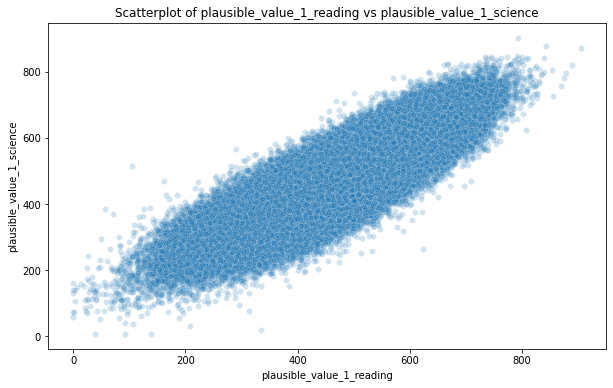

In [22]:
scatter('plausible_value_1_reading', 'plausible_value_1_science')

In [23]:
df_pisa[['plausible_value_1_science' ,'plausible_value_1_reading']].corr().compute()

,plausible_value_1_science,plausible_value_1_reading
plausible_value_1_science,1.000000,0.875688
plausible_value_1_reading,0.875688,1.000000


> The scatterplot and pearson correlation values show that students that perform well in reading show similar proficiency in science and vice versa, but to a lesser extent than the relationship between math and science and stronger than the relationship between math and reading.

###What is the distribution of plausible_value_1_math across the two genders?

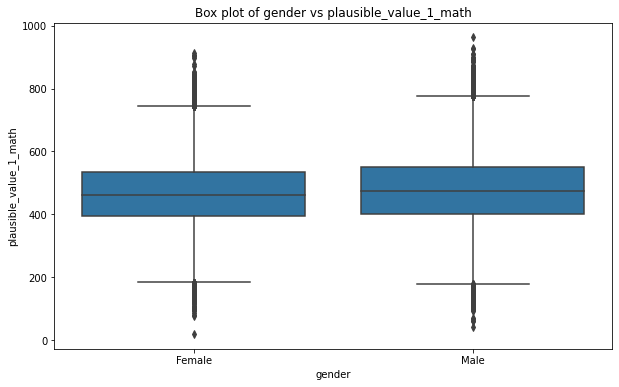

In [24]:
box('gender', 'plausible_value_1_math')

In [25]:
df_pisa.groupby('gender')['plausible_value_1_math'].agg(['mean', 'std']).compute()

,mean,std
gender,,
Female,465.645895,99.598500
Male,477.990912,105.050474


> From the box plot and calculated mean, the male group perform slightly better in the math test compared to the female group, but the scores are more widely distributed in the male group as evidenced by the wider iqr and higher standard deviation. The box plot also shows that by the highest scorers in math are mostly male, and the lowest scorers are mostly female.

###What is the distribution of plausible_value_1_science across the two genders?

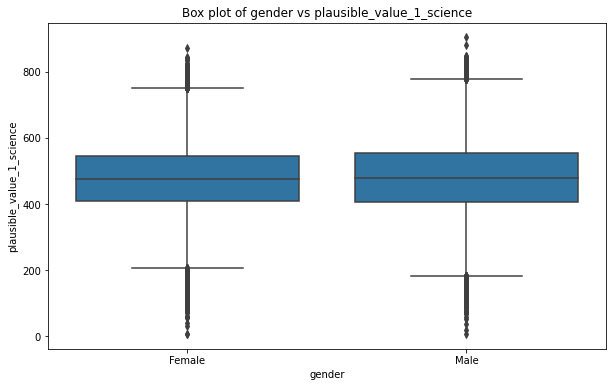

In [26]:
box('gender', 'plausible_value_1_science')

In [27]:
df_pisa.groupby('gender')['plausible_value_1_science'].agg(['mean', 'std']).compute()

,mean,std
gender,,
Female,477.017493,96.831238
Male,478.959909,104.029481


> From the box plot and calculated mean, the male and female group perform almost identically on the science test, with the male group having a wider distribution of scores.

###What is the distribution of plausible_value_1_reading across the two genders?

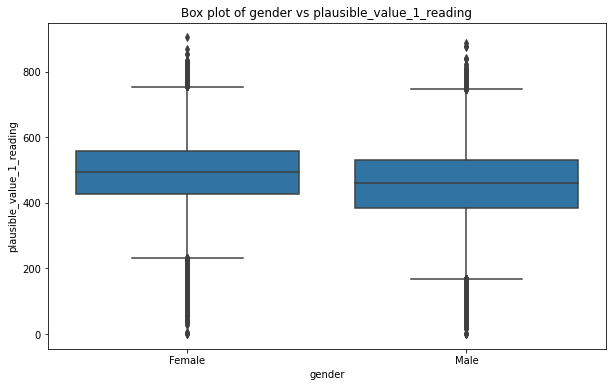

In [28]:
box('gender', 'plausible_value_1_reading')

In [29]:
df_pisa.groupby('gender')['plausible_value_1_reading'].agg(['mean', 'std']).compute()

,mean,std
gender,,
Female,491.536754,95.498825
Male,456.958643,103.624595


> From the box plot and the calculated mean, the female group perform better than the male group on the reading test, with the male group having a wider distribution of scores.

###What is the relationship between oecd_country and attended_isced_0?

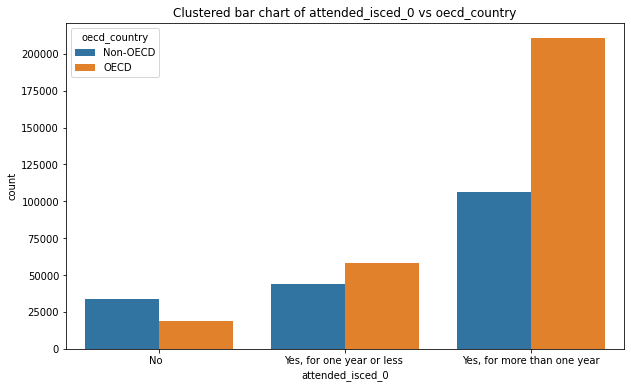

In [30]:
clustered_bar('attended_isced_0', 'oecd_country', ['No  ', 'Yes, for one year or less ', 'Yes, for more than one year'])

> The clustered bar chart shows that students in OECD countries show greater participation in the ISCED level 0 programme compared to their Non-OECD counterparts.

###What is the relationship between gender and oecd_country?

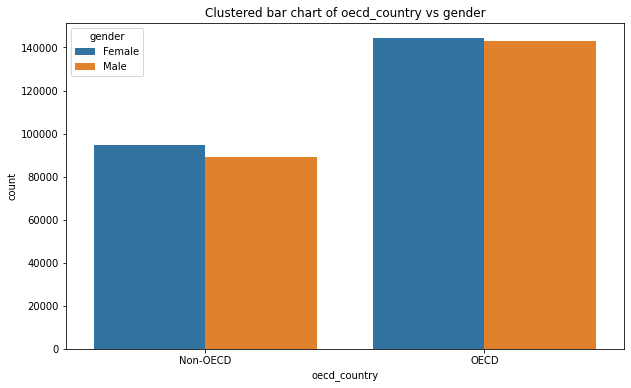

In [31]:
clustered_bar('oecd_country', 'gender')

> From the clustered bar chart, there is a slightly higher proportion of female students in the Non-OECD countries in comparison to the OECD countries.

###What is the relationship between country_of_birth and plausible_value_1_math?

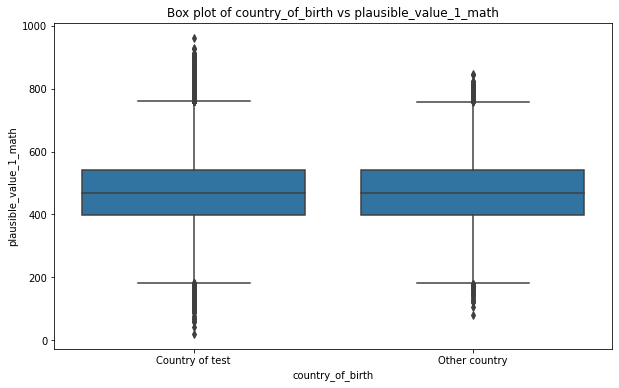

In [32]:
box('country_of_birth', 'plausible_value_1_math')

In [33]:
df_pisa.groupby('country_of_birth')['plausible_value_1_math'].agg(['mean', 'std']).compute()

,mean,std
country_of_birth,,
Country of test,471.817291,102.475549
Other country,470.596430,102.908943


> There is no appreciable difference in math test performance between students born in the country of test and students that moved to a different country.

###What is the relationship between country_of_birth and plausible_value_1_science?

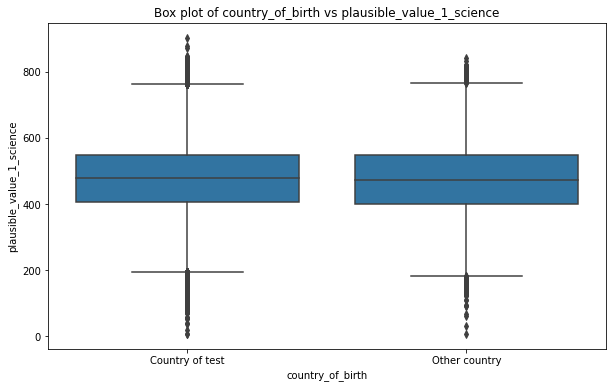

In [34]:
box('country_of_birth', 'plausible_value_1_science')

In [35]:
df_pisa.groupby('country_of_birth')['plausible_value_1_science'].agg(['mean', 'std']).compute()

,mean,std
country_of_birth,,
Country of test,478.289083,100.101255
Other country,473.931862,104.714031


> There is little difference in science test performance between students born in the country of test and students that moved to a different country.

###What is the relationship between country_of_birth and plausible_value_1_reading?

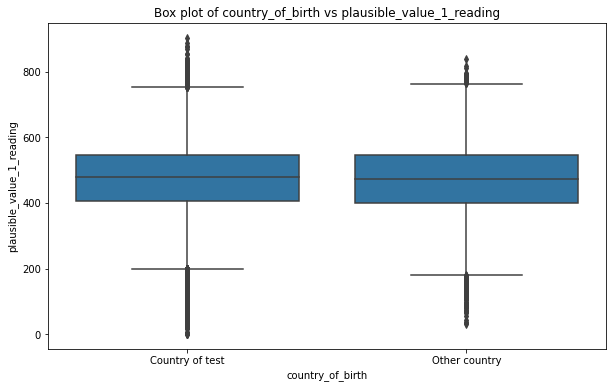

In [36]:
box('country_of_birth', 'plausible_value_1_reading')

In [37]:
df_pisa.groupby('country_of_birth')['plausible_value_1_reading'].agg(['mean', 'std']).compute()

,mean,std
country_of_birth,,
Country of test,474.839501,100.616335
Other country,470.101085,106.702540


> There is little difference in reading test performance between students born in the country of test and students that moved to a different country.

###Which 7 regions have the highest average in math test performance?

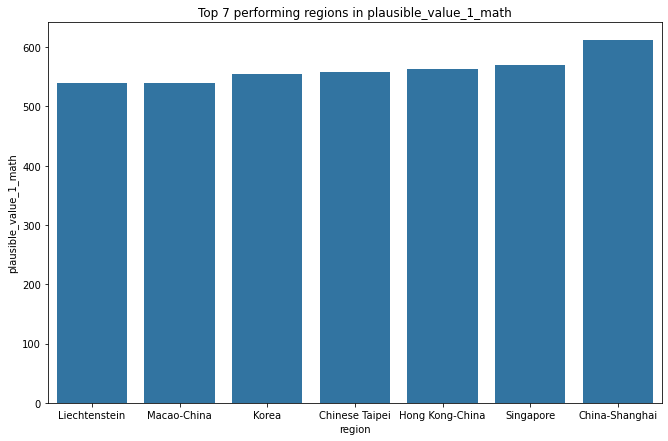

In [38]:
top_region_perf('plausible_value_1_math')

> With the exception of Liechtenstein in 7th place, the top 7 are Asian countries, with China-Shanghai in first place.

###Which 7 regions have the highest average in science test performance?

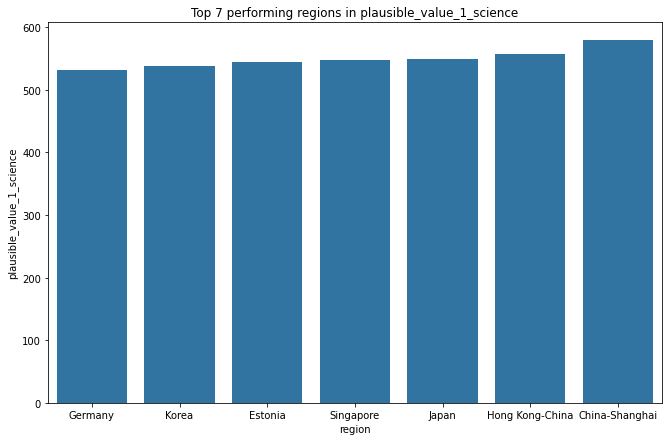

In [39]:
top_region_perf('plausible_value_1_science')

With the exception of Estonia and Poland in 5th and 7th place respectively, the top 7 are Asian countries, with China-Shanghai in first place.

###Which 7 regions have the highest average in reading test performance?

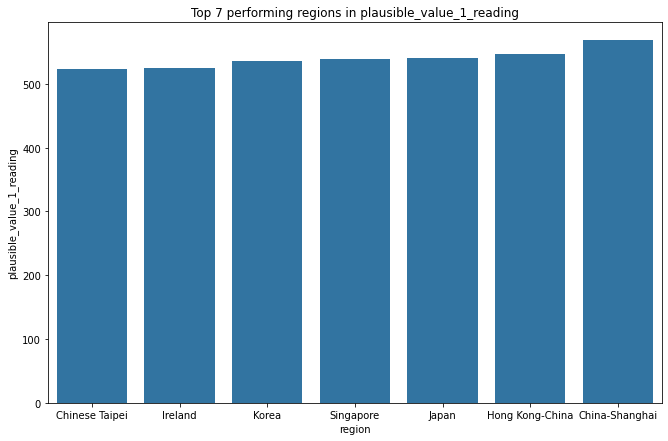

In [40]:
top_region_perf('plausible_value_1_reading')

With the exception of Ireland in 6th place, the top 7 are Asian countries, with China-Shanghai in first place.

## Multivariate Exploration

###How does attended_isced_0 affect plausible_value_1_math in both OECD and Non-OECD countries?

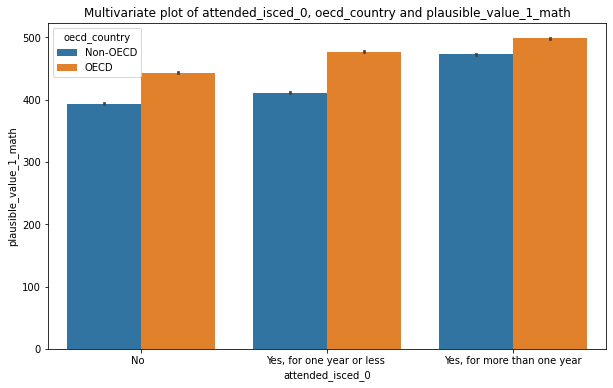

In [41]:
multi_bar('attended_isced_0', 'oecd_country', ['No  ', 'Yes, for one year or less ', 'Yes, for more than one year'], 'plausible_value_1_math')

> Lengthier participation in the ISCED Level 0 is shown to be a marker for better performance in the math test for groups both OECD and Non-OECD students. Students in OECD countries also generally outperform those in Non-OECD countries, except for the case of Non-OECD students that attended ISCED 0 for more than one year against OECD students that never attended ISCED 0.

> OECD and  Non-OECD students that attended ISCED 0 for more than one year show closer levels of performance compared to the other two groups.

###How does attended_isced_0 affect plausible_value_1_science in both OECD and Non-OECD countries?

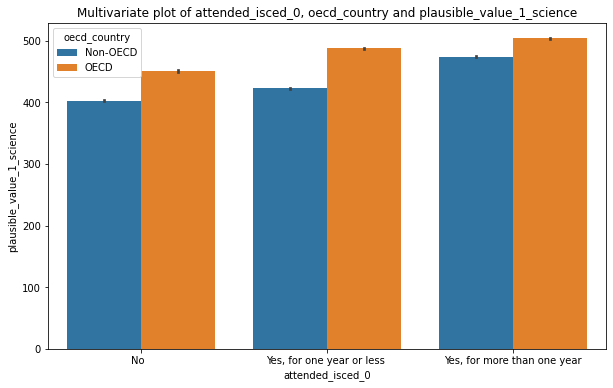

In [42]:
multi_bar('attended_isced_0', 'oecd_country', ['No  ', 'Yes, for one year or less ', 'Yes, for more than one year'], 'plausible_value_1_science')

> Lengthier participation in the ISCED Level 0 is shown to be a marker for better performance in the science test for groups both OECD and Non-OECD students. Students in OECD countries also generally outperform those in Non-OECD countries, except for the case of Non-OECD students that attended ISCED 0 for more than one year against OECD students that never attended ISCED 0.

> OECD and  Non-OECD students that attended ISCED 0 for more than one year show closer levels of performance compared to the other two groups.

###How does attended_isced_0 affect plausible_value_1_reading in both OECD and Non-OECD countries?

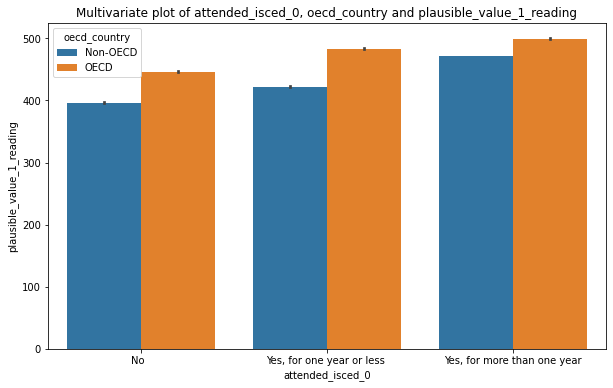

In [43]:
multi_bar('attended_isced_0', 'oecd_country', ['No  ', 'Yes, for one year or less ', 'Yes, for more than one year'], 'plausible_value_1_reading')

> Lengthier participation in the ISCED Level 0 is shown to be a marker for better performance in the reading test for groups both OECD and Non-OECD students. Students in OECD countries also generally outperform those in Non-OECD countries, except for the case of Non-OECD students that attended ISCED 0 for more than one year against OECD students that never attended ISCED 0.

> OECD and Non-OECD students that attended ISCED 0 for more than one year show closer levels of performance compared to the other two groups.

## Conclusions
A summary of the insights from the EDA:
<ul>
  <li>The scores from the math, science and reading tests are approximately normal in distribution.</li>
  <li>There is a high degree of correlation between the scores in the 3 tests. Students who perform well in one are likely to perform well in the other two.</li>
  <li>When grouped by gender, the male group tend to score higher in math, while the female group tend to score higher in reading. Performance in science is about equal for the two groups</li>
  <li>There is a higher proportion of students from OECD countries that attended the ISCED Level 0 programme compared to students from Non-OECD countries.</li>
  <li>There is no gender disparity in students from both OECD and Non-OECD countries</li>
  <li>Whether a student moved to another country at some point in the past or not hardly affected test performance. Further investigation might be required.</li>
  <li>Across all tests the top performing regions were mostly Asian, with the China-Shanghai region coming out on top in all test scores.</li>
  <li>Students from OECD countries tend to perform better in all tests than their Non-OECD counterparts.</li>
  <li>Attendance of the ISCED Level 0 is shown to have a positive impact on test performance.</li>
</ul>
